Herein I am building my first Feed Forward Neural Network from scratch (of course with some help).
We are building this FFNN against the Sigmoid Neuron, showcasing the significant improvements that our FFNN has over the Sigmoid Neuron classification.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook
# Any results you write to the current directory are saved as output.

In [2]:
#Generating data
data, labels = make_blobs(n_samples = 1000, centers = 4, n_features = 2, random_state = 0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


In [3]:
#Defining the FNN Class
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None
        
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
    
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
    
    def grad_w_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron)
        if y == 0:
            return y_pred * x
        elif y == 1:
            return -1 * (1 - y_pred) * x
        else:
            raise ValueError('y must be 0 or 1')
    
    def grad_b_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred
        elif y == 1:
            return -1 * (1 - y_pred)
        else:
            raise ValueError('y must be 0 or 1')
            
    def fit(self, X, Y, epochs = 1, learning_rate = 1, initialize = True, loss_fn = 'mse', display_loss = False):
        #initializing w and b
        if initialize:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
            
        if display_loss:
            loss = {}
            
        for i in tqdm_notebook(range(epochs), total = epochs, unit = 'epochs'):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                if loss_fn == 'mse':
                    dw += self.grad_w_mse(x, y)
                    db += self.grad_b_mse(x, y)
                elif loss_fn == 'ce':
                    dw += self.grad_w_ce(x, y)
                    db += self.grad-b_ce(x, y)
                    
            m = X.shape[1]
            self.w -= learning_rate * dw/m
            self.b -= learning_rate * db/m
            
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                if loss_fn == 'mse':
                    loss[i] = mean_squared_error(Y, Y_pred)
                elif loss_fn == 'ce':
                    loss[i] = log_loss(Y, Y_pred)
                    
        if display_loss:
            plt.figure(figsize = (20, 6))
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            if loss_fn == 'mse':
                plt.ylabel('Loss_Mean Squared Error')
            elif loss_fn == 'ce':
                plt.ylabel('Loss_Log Loss')
            plt.show()
            
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

In [4]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['red', 'yellow', 'green'])

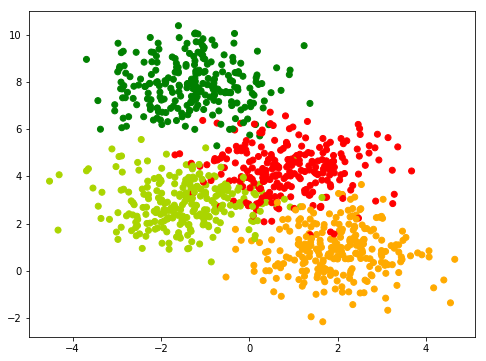

In [5]:
#Let us look at the data generated
plt.figure(figsize = (8, 6))
plt.scatter(data[:, 0], data[:,1], c = labels, cmap = my_cmap)
plt.show()

In [6]:
#Let us classify the data as binary, by segmenting it into 2 labelsinstead of 4
labels_orig = labels
labels = np.mod(labels_orig, 2)

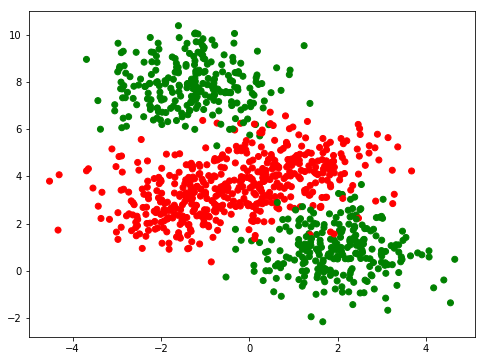

In [7]:
#Checking the data again post its segmentation into just 2 classes
plt.figure(figsize = (8, 6))
plt.scatter(data[:,0], data[:,1], c = labels, cmap = my_cmap)
plt.show()

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify = labels, random_state = 6)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(750, 2) (250, 2)
(750,) (250,)


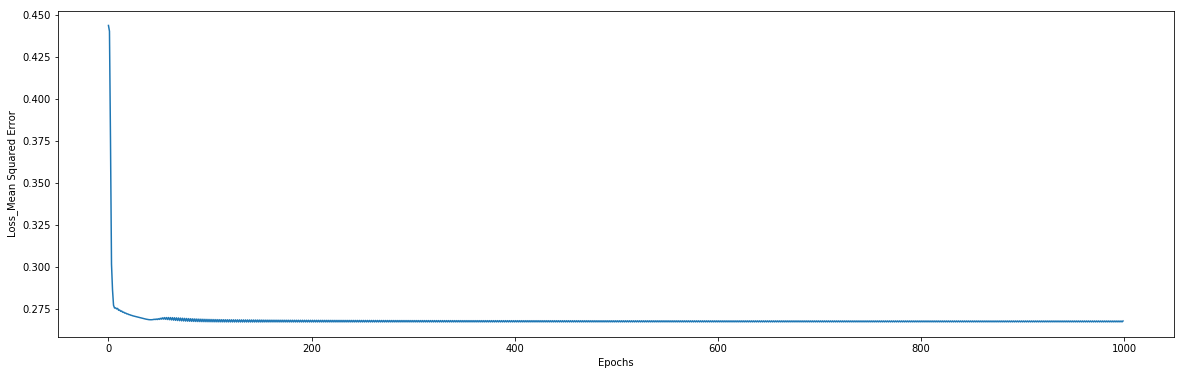

In [9]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs = 1000, learning_rate = 0.5, display_loss = True)

In [10]:
Y_pred_train_sig = sn.predict(X_train)
Y_pred_train_sig_bin = (Y_pred_train_sig >= 0.5).astype("int").ravel()
Y_pred_test_sig = sn.predict(X_test)
Y_pred_test_sig_bin = (Y_pred_test_sig >= 0.5).astype("int").ravel()
acc_train_sig = accuracy_score(Y_pred_train_sig_bin, Y_train)
acc_test_sig = accuracy_score(Y_pred_test_sig_bin, Y_test)

print('Sigmoid Training set accuracy:', acc_train_sig)
print('Sigmoid Testing set accuracy:', acc_test_sig)

Sigmoid Training set accuracy: 0.728
Sigmoid Testing set accuracy: 0.72


Text(0.5, 1.0, 'Sigmoid Predicted Dataset Scatterplot')

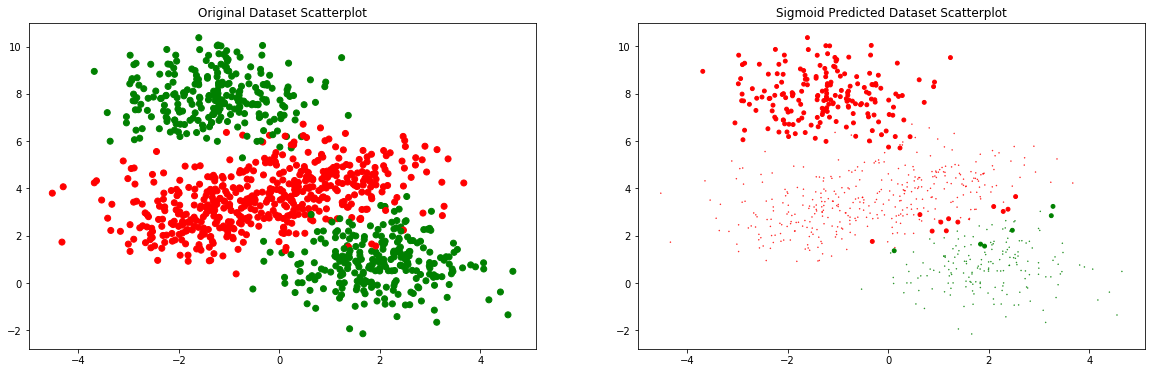

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
ax1.scatter(data[:,0], data[:,1], c = labels, cmap = my_cmap) #Replotting the original data
ax1.set_title('Original Dataset Scatterplot')
ax2.scatter(X_train[:,0], X_train[:,1], c = Y_pred_train_sig_bin, cmap = my_cmap, 
            s = 15*np.abs(Y_pred_train_sig_bin - Y_train) + 0.2) #Plotting the predictions on the original data
ax2.set_title('Sigmoid Predicted Dataset Scatterplot')

The plots above shows that the Sigmoid Neuron is able to classify the data points only linearly, at the interface where there are quite a few prominent red and green plot points, thus making significant mistakes.
Quite a few of the data points have been incorrectly predicted as red, although they were green(refer to the previous scatter plot).
The mini plot points show the correct predictions.
This accounts for the medium accuracy of the predictions as the Sigmoid fails to classify them correctly.


Let us now try to build our first Feedforward Neural Network. We will define the class for that, and inside it the initiation of the variables, w1, w2....wn along with the biases b1, b2....bn. We will also call the fit and the predict functions.

In [12]:
class FFNetwork:
    
    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
        
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def fwd_pass(self, x):
        self.x1, self.x2 = x
        self.a1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        return self.h3
    
    def grad(self, x, y):
        self.fwd_pass(x)
        
        self.dw5 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.h1
        self.dw6 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.h2
        self.db3 = (self.h3 - y) * self.h3 * (1 - self.h3)
        
        self.dw1 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w5 * self.h1 * (1 - self.h1) * self.x1
        self.dw2 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w5 * self.h1 * (1 - self.h1) * self.x2
        self.db1 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w5 * self.h1 * (1 - self.h1)
        
        self.dw3 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w6 * self.h2 * (1 - self.h2) * self.x1
        self.dw4 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w6 * self.h2 * (1 - self.h2) * self.x2
        self.db2 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w6 * self.h2 * (1 - self.h2)
        
        
    def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True, display_loss = False):
        #initialise w and b
        if initialise:
            self.w1 = np.random.randn()
            self.w2 = np.random.randn()
            self.w3 = np.random.randn()
            self.w4 = np.random.randn()
            self.w5 = np.random.randn()
            self.w6 = np.random.randn()
            self.b1 = 0
            self.b2 = 0
            self.b3 = 0
            
        if display_loss:
            loss = {}
            
        for i in tqdm_notebook(range(epochs), total = epochs, unit = 'epoch'):
            dw1, dw2, dw3,dw4, dw5, dw6, db1, db2, db3 = [0] * 9
            for x, y in zip(X, Y):
                self.grad(x, y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
                
            m = X.shape[1]
            self.w1 -= learning_rate * dw1/m
            self.w2 -= learning_rate * dw2/m
            self.w3 -= learning_rate * dw3/m
            self.w4 -= learning_rate * dw4/m
            self.w5 -= learning_rate * dw5/m
            self.w6 -= learning_rate * dw6/m
            self.b1 -= learning_rate * db1/m
            self.b2 -= learning_rate * db2/m
            self.b3 -= learning_rate * db3/m
            
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = mean_squared_error(Y_pred, Y)
            
        if display_loss:
            plt.figure(figsize = (20, 6))
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Loss_Mean Squared Error')
            plt.show()
                
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.fwd_pass(x)
            Y_pred.append(y_pred)
            
        return np.array(Y_pred)

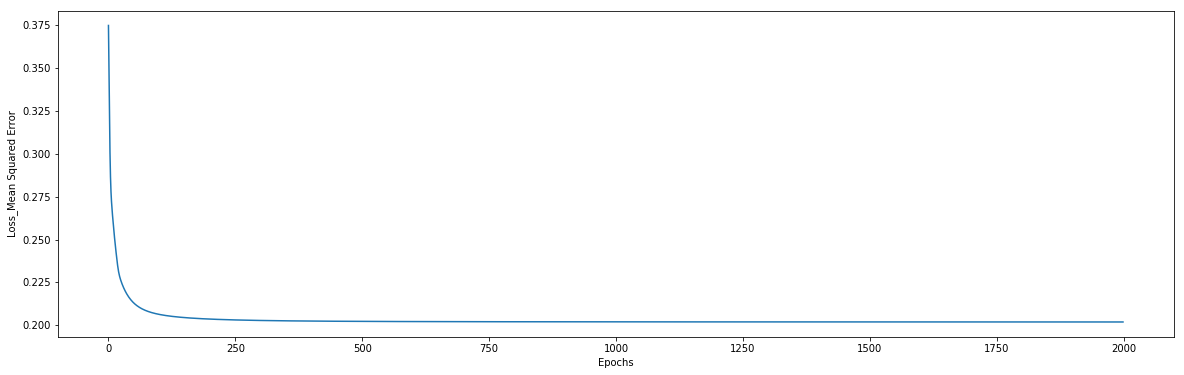

In [13]:
ffn = FFNetwork()
ffn.fit(X_train, Y_train, epochs = 2000, learning_rate = 0.01, initialise = True, display_loss = True)

In [14]:
Y_pred_train_ffn = ffn.predict(X_train)
Y_pred_train_ffn_bin = (Y_pred_train_ffn > 0.5).astype('int').ravel()
Y_pred_test_ffn = ffn.predict(X_test)
Y_pred_test_ffn_bin = (Y_pred_test_ffn > 0.5).astype('int').ravel()
acc_train_ffn = accuracy_score(Y_pred_train_ffn_bin, Y_train)
acc_test_ffn = accuracy_score(Y_pred_test_ffn_bin, Y_test)

print('The training set accuracy for the FFN is:', acc_train_ffn)
print('The test set accuracy for the FFN is:', acc_test_ffn)

The training set accuracy for the FFN is: 0.6773333333333333
The test set accuracy for the FFN is: 0.624


Text(0.5, 1.0, 'FFN Predicted Dataset Scatterplot')

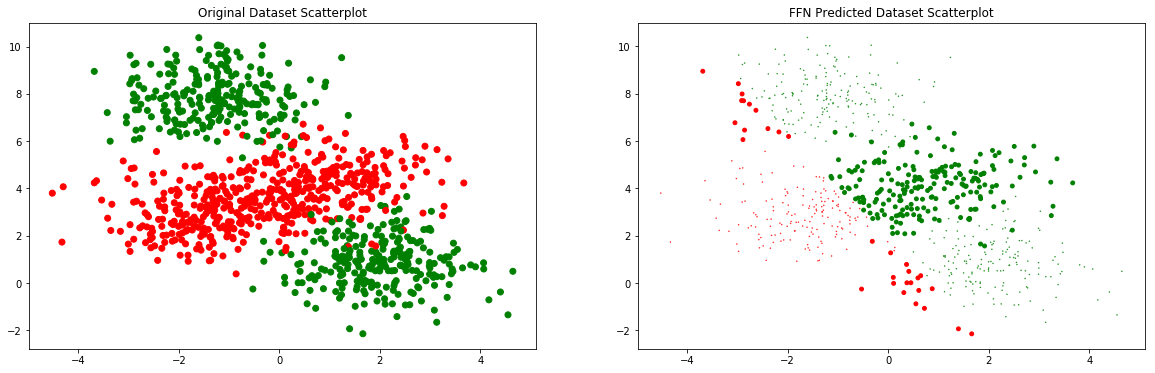

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
ax1.scatter(data[:,0], data[:,1], c = labels, cmap = my_cmap) #Replotting the original data
ax1.set_title('Original Dataset Scatterplot')
ax2.scatter(X_train[:,0], X_train[:,1], c = Y_pred_train_ffn_bin, cmap = my_cmap, 
            s = 15*np.abs(Y_pred_train_ffn_bin - Y_train) + 0.2) #Plotting the predictions on the original data
ax2.set_title('FFN Predicted Dataset Scatterplot')

Now after we have run our FFN, we can see that the classification is much more effective and accurate.
The mini plot points, much larger in number than that after the Sigmoid classification, prove that a much larger number of points have been clasisified correctly.
Only at the interfaces of the classes, there are just a few prominent plot points indicating errors on part of the FFN classifier. 
Overall the classifier has done an excellent job.

The Generic Feed Forward Neural Network class

In [16]:
#Now, moving on to our generic FF Neural Network class for Binary Classification
class FFNN:
    
    def __init__(self, n_inputs, hidden_sizes = [2]):
        self.nx = n_inputs
        self.ny = 1
        self.nh = len(hidden_sizes)
        self.sizes = [self.nx] + hidden_sizes + [self.ny]
        
        self.W = {}
        self.B = {}
        for i in range(self.nh + 1):
            self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
            self.B[i+1] = np.zeros((1, self.sizes[i+1]))
            
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def fwd_pass(self, x):
        self.A = {}
        self.H = {}
        self.H[0] = x.reshape(1, -1)
        for i in range(self.nh + 1):
            self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
            self.H[i+1] = self.sigmoid(self.A[i+1])
        return self.H[self.nh + 1]
    
    def grad_sigmoid(self, x):
        return x * (1 - x)
    
    def grad(self, x, y):
        self.fwd_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
            
    def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True, display_loss = False):
        #initialise w and b
        if initialise:
            for i in range(self.nh + 1):
                self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
                self.B[i+1] = np.zeros((1, self.sizes[i+1]))
                
        if display_loss:
            loss = {}
            
        for e in tqdm_notebook(range(epochs), total = epochs, unit = 'epoch'):
            dW = {}
            dB = {}
            for i in range(self.nh + 1):
                dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                dB[i+1] = np.zeros((1, self.sizes[i+1]))
            for x, y in zip(X, Y):
                self.grad(x, y)               
                for i in range(self.nh + 1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]
                    
            m = X.shape[1]
            for i in range(self.nh + 1):
                self.W[i+1] -= learning_rate * dW[i+1]/m
                self.B[i+1] -= learning_rate * dB[i+1]/m
                
            if display_loss:
                Y_pred = self.predict(X)
                loss[e] = mean_squared_error(Y_pred, Y)
                
        if display_loss:
            plt.figure(figsize = (20, 6))
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Loss_Mean Squared Error')
            plt.show()
            
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.fwd_pass(x)
            Y_pred.append(y_pred)
        
        return np.array(Y_pred).squeeze()

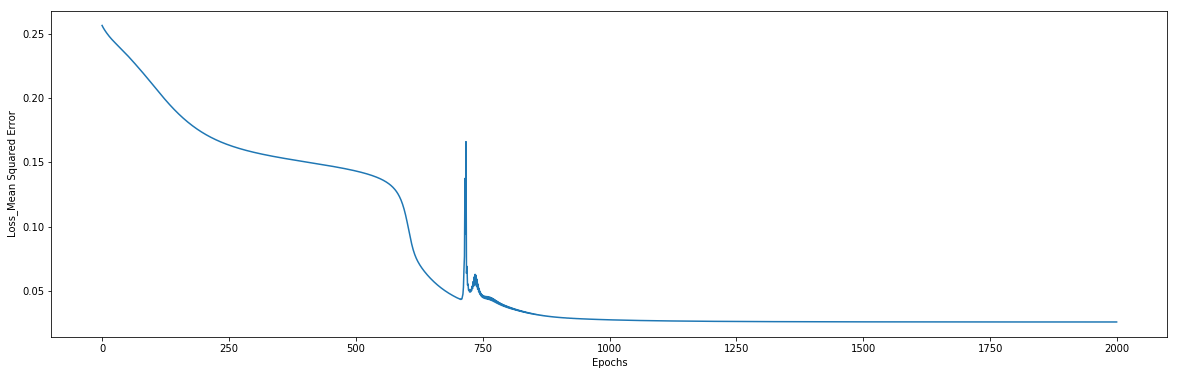

In [17]:
ffnn = FFNN(2, [2, 3])
ffnn.fit(X_train, Y_train, epochs = 2000, learning_rate = 0.001, display_loss = True)

Now let us perform the predictions and evaluate our FFNN model's performance.

In [18]:
Y_pred_train_ffnn = ffnn.predict(X_train)
Y_pred_train_ffnn_bin = (Y_pred_train_ffnn > 0.5).astype('int').ravel()
Y_pred_test_ffnn = ffnn.predict(X_test)
Y_pred_test_ffnn_bin = (Y_pred_test_ffnn > 0.5).astype('int').ravel()
acc_train_ffnn = accuracy_score(Y_pred_train_ffnn_bin, Y_train)
acc_test_ffnn = accuracy_score(Y_pred_test_ffnn_bin, Y_test)

print('FFNN training set accuracy is:', acc_train_ffnn)
print('FFNN test set accuracy is:', acc_test_ffnn)


FFNN training set accuracy is: 0.9666666666666667
FFNN test set accuracy is: 0.968


Text(0.5, 1.0, 'FFNN Predicted Dataset Scatterplot')

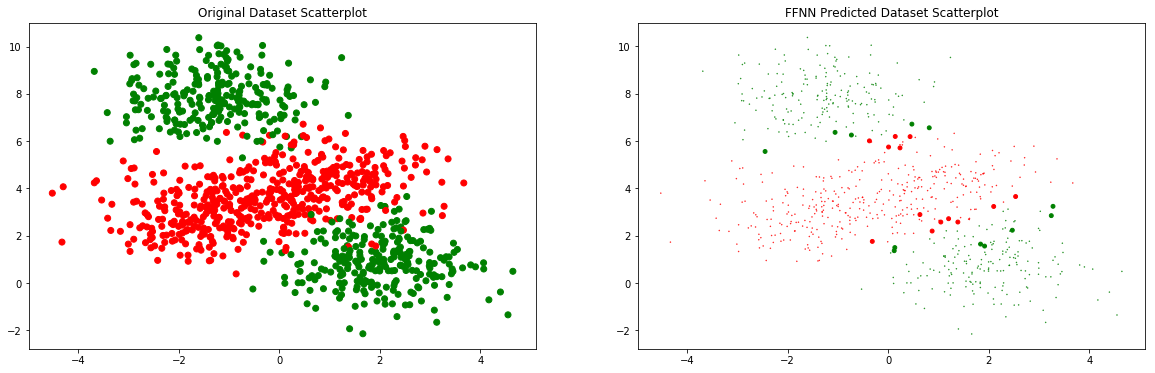

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
ax1.scatter(data[:,0], data[:,1], c = labels, cmap = my_cmap) #Replotting the original data
ax1.set_title('Original Dataset Scatterplot')
ax2.scatter(X_train[:,0], X_train[:,1], c = Y_pred_train_ffnn_bin, cmap = my_cmap, 
            s = 15*np.abs(Y_pred_train_ffnn_bin - Y_train) + 0.2) #Plotting the predictions on the original data
ax2.set_title('FFNN Predicted Dataset Scatterplot')

So far we have worked with FNNs that perform binary classifications.

Now we will build a generic Feedforward Neural Network for **Multi-Class Classification**.
For that, we will need to work on our original multi-class data with multiple labels.

In [20]:
#Splittng the original data
X_train, X_test, Y_train, Y_test = train_test_split(data, labels_orig, stratify = labels_orig, random_state = 6)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, labels_orig.shape)

(750, 2) (250, 2) (750,) (250,) (1000,)


Now we will need to encode our output, i.e. Y. and WHY do we need to do that? Think....Think....

Okay, so the Feedforward Neural Network Classification will generate multiple output classes in the form of Binary Numbers only, with values between 0 and 1.
So our output, that looks like 0, 1, 2, 3 will be represented as such(sample representation only):
* 1000 --> Indicates Class 0
* 0100 --> Indicates Class 1
* 0010 --> Indicates Class 2
* 0001 --> Indicates Class 3

And for this, we will need to encode our output. So, here we go.

In [21]:
Y_train_enc = pd.get_dummies(Y_train)
Y_test_enc = pd.get_dummies(Y_test)
print(Y_train_enc.shape, Y_test_enc.shape)
Y_train_enc.head(10)

(750, 4) (250, 4)


,0,1,2,3
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0
5,1,0,0,0
6,0,1,0,0
7,1,0,0,0
8,0,1,0,0
9,0,0,0,1


In [22]:
Y_train_enc = Y_train_enc.values

In [23]:
#Now, moving on to our generic FF Neural Network class for Multi-Class Classification
class FFNNMulti:
    
    def __init__(self, n_inputs, n_outputs, hidden_sizes = [3]):
        self.nx = n_inputs
        self.ny = n_outputs
        self.nh = len(hidden_sizes)
        self.sizes = [self.nx] + hidden_sizes + [self.ny]
        
        self.W = {}
        self.B = {}
        for i in range(self.nh + 1):
            self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
            self.B[i+1] = np.zeros((1, self.sizes[i+1]))
            
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def softmax(self, x):
        exps = np.exp(x)
        return exps/np.sum(exps)
    
    def fwd_pass(self, x):
        self.A = {}
        self.H = {}
        self.H[0] = x.reshape(1, -1)
        for i in range(self.nh):
            self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
            self.H[i+1] = self.sigmoid(self.A[i+1])
        self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
        self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
        return self.H[self.nh + 1]
    
    def grad_sigmoid(self, x):
        return x * (1 - x)
    
    def grad(self, x, y):
        self.fwd_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
            
    def cross_entropy(self,label,pred):
        yl=np.multiply(pred,label)
        yl=yl[yl!=0]
        yl=-np.log(yl)
        yl=np.mean(yl)
        return yl
    
    def fit(self, X, Y, epochs = 100, learning_rate = 1, initialise = True, display_loss = False):
        #initialise w and b
        if initialise:
            for i in range(self.nh + 1):
                self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
                self.B[i+1] = np.zeros((1, self.sizes[i+1]))
                
        if display_loss:
            loss = {}
            
        for e in tqdm_notebook(range(epochs), total = epochs, unit = 'epoch'):
            dW = {}
            dB = {}
            for i in range(self.nh + 1):
                dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                dB[i+1] = np.zeros((1, self.sizes[i+1]))
            for x, y in zip(X, Y):
                self.grad(x, y)               
                for i in range(self.nh + 1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]
                    
            m = X.shape[1]
            for i in range(self.nh + 1):
                self.W[i+1] -= learning_rate * dW[i+1]/m
                self.B[i+1] -= learning_rate * dB[i+1]/m
                
            if display_loss:
                Y_pred = self.predict(X)
                loss[e] = self.cross_entropy(Y, Y_pred)
                
        if display_loss:
            plt.figure(figsize = (20, 6))
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Cross Entropy')
            plt.show()
            
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.fwd_pass(x)
            Y_pred.append(y_pred)
        
        return np.array(Y_pred).squeeze()

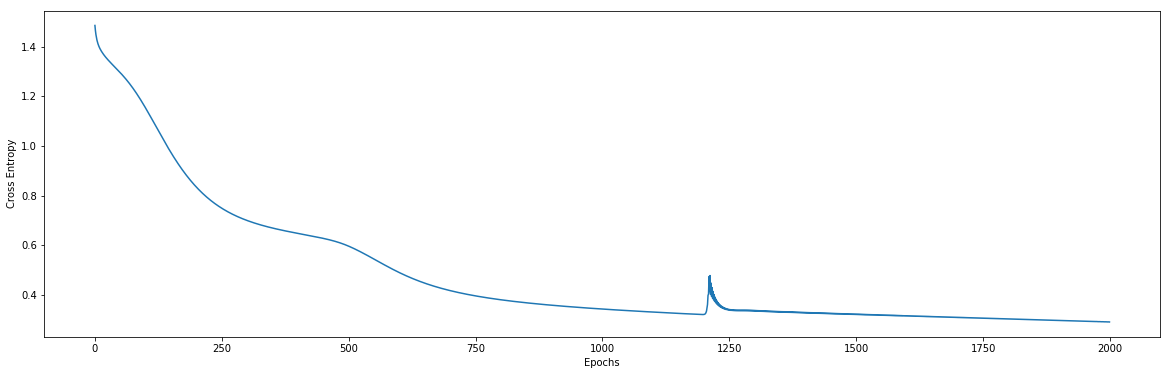

In [24]:
ffnnm = FFNNMulti(2, 4, [2, 3])
ffnnm.fit(X_train, Y_train_enc, epochs = 2000, learning_rate = 0.001, display_loss = True)

Now let us perform the predictions and evaluate our FFNN Multi-Class model's performance.

In [25]:
Y_pred_train_ffnnm = ffnnm.predict(X_train)
Y_pred_train_ffnnm = np.argmax(Y_pred_train_ffnnm, 1)

Y_pred_test_ffnnm = ffnnm.predict(X_test)
Y_pred_test_ffnnm = np.argmax(Y_pred_test_ffnnm,1)

acc_train_ffnnm = accuracy_score(Y_pred_train_ffnnm, Y_train)
acc_test_ffnnm = accuracy_score(Y_pred_test_ffnnm, Y_test)

print('FFNNM training set accuracy is:', acc_train_ffnnm)
print('FFNNM test set accuracy is:', acc_test_ffnnm)

FFNNM training set accuracy is: 0.8933333333333333
FFNNM test set accuracy is: 0.876


Text(0.5, 1.0, 'FFNNM Predicted Dataset Scatterplot')

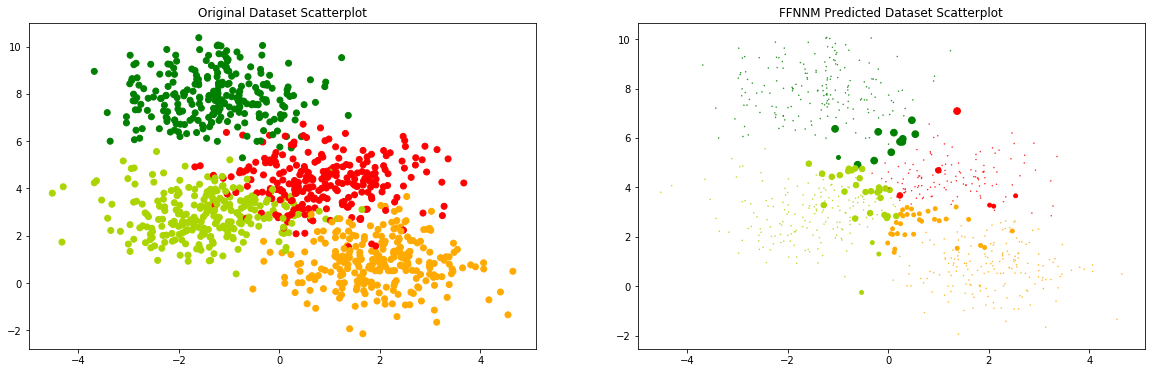

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
ax1.scatter(data[:,0], data[:,1], c = labels_orig, cmap = my_cmap) #Replotting the original data
ax1.set_title('Original Dataset Scatterplot')
ax2.scatter(X_train[:,0], X_train[:,1], c = Y_pred_train_ffnnm, cmap = my_cmap, 
            s = 15*np.abs(Y_pred_train_ffnnm - Y_train) + 0.2) #Plotting the predictions on the original data
ax2.set_title('FFNNM Predicted Dataset Scatterplot')